### Description

The main purpose of this is to visualize the data but include the total charge in the size of each point, as Kaggle visualization and other neutrino detection papers discuss. That is, for each sensor (DOM) we see how many times in a given input event it was pinged, add the charges of each ping, and that total charge is the size of the pulse for that sensor. We then color the pulse by the first time that DOM was pinged. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Uncomment to toggle interactivity of matplotlib plots
%matplotlib notebook

In [102]:
# Load data
batch1 = pd.read_parquet('../batches_train/batch_1_repartitions/part.0.parquet')
sensor_geom = pd.read_csv('../sensor_geometry.csv')
event_ids = list(set(batch1.index))

In [120]:
# Testing one that gave a big pulse visually, to check I coded right
event393275 = batch1[batch1.auxiliary==False].loc[event_ids[33]]

In [122]:
event393275.groupby('sensor_id').sum().charge

sensor_id
1978     1.175000
1979     1.225000
2578     1.900000
2579     1.525000
2637     1.525000
2638     1.625000
3647     0.675000
3648     5.100000
3649     0.825000
4106     2.150000
4107     0.925000
4467     2.500000
4469     3.425000
4470     2.400000
4471    41.850000
4472    93.525001
4473    14.675000
4474     3.275000
Name: charge, dtype: float64

In [11]:
# Make a function that outputs (x,y,z) for a sensor_id input
def id_to_xyz(sen):
    row = tuple(sensor_geom.loc[sen][1:4])
    return row

In [115]:
def event_plot(eventid, 
               aux_incl=False, 
               show_sensors=True):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    event = batch1.loc[eventid]
    
    # Aux false or both?
    if aux_incl==False:
        event = event[event.auxiliary==False]
    else:
        pass
    
    # Each sensor will register one point; total charge (sum over all 
    # times that sensor registered a charge) corresponds to size in plot
    sensors_and_charge = event.groupby('sensor_id').sum()['charge']
    sensors = np.array(sensors_and_charge.index)
    
    # Cartesian coords of sensors to plot
    xs = [id_to_xyz(s)[0] for s in sensors]
    ys = [id_to_xyz(s)[1] for s in sensors]
    zs = [id_to_xyz(s)[2] for s in sensors]
    
    # Sizes computed from values in sensors_and_charge 
    sizes = sensors_and_charge.values
    
    # Times are computed by first time sensor registered a pulse
    times = [event[event.sensor_id==s].time.values[0] for s in sensors]

    # This scatter plots the sensor pulses
    im = ax.scatter(xs, ys, zs,
                    c=times,
                    cmap='rainbow_r',
                    s=10*sizes,
                    zorder=2,
                    label='pulse',
                    alpha=1)
    
    # This plots the sensors
    if show_sensors==True:
        ax.scatter(sensor_geom.x, sensor_geom.y, sensor_geom.z,
                   c='0.1',
                   alpha=0.03,
                   s=0.5,
                   zorder=1)

    # Color bar, legend, other niceties
    plt.colorbar(im,
                 orientation='vertical', 
                 label='Nanoseconds passed in event',
                 location='left',
                 fraction=0.02, 
                 pad=0.1)
    
    plt.title("Neutrino event " + str(eventid) + ", aux = " + str(aux_incl),
              fontsize=12)
    plt.legend(loc=(-0.3,0.9))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    ax.view_init(30,-45)
    
    ax.grid(False)
    
    # This block turns off axes and gridlines and makes the 
    # background color a nice grey
#     ax.axis('off')
#     ax.patch.set_visible(False)
#     fig.patch.set_facecolor('whitesmoke')
    
    # Saving file, idk how to save interactivity right now

    plt.show()

<IPython.core.display.Javascript object>


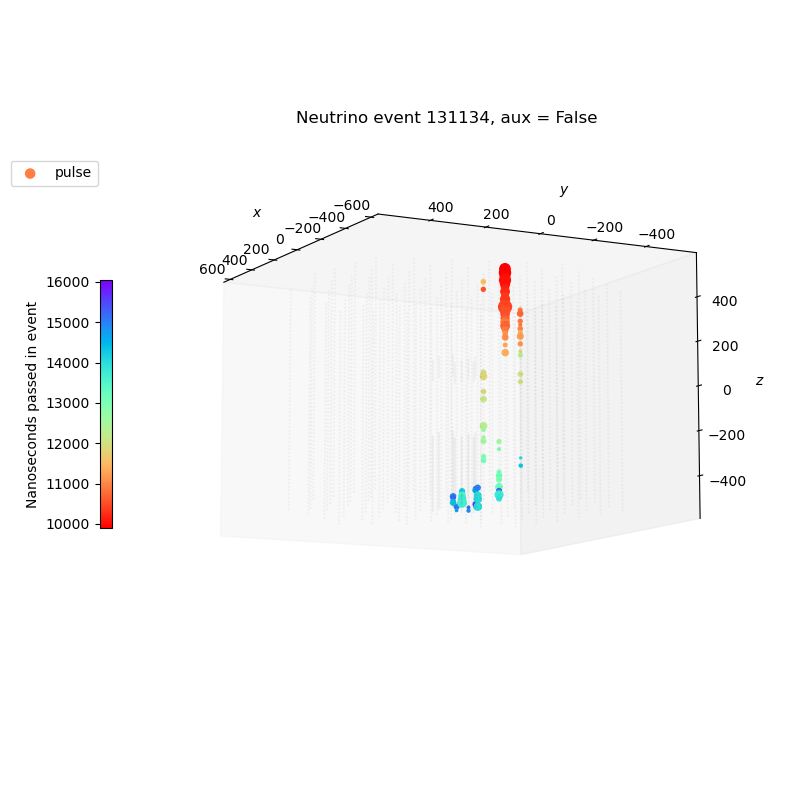

In [123]:
event_plot(event_ids[34], aux_incl=False)